In [2]:
import os
import pandas as pd

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_lig_Kd_UV/'

data = pd.read_csv(workdir + '20230418_nir.csv')

In [3]:
for name in data.columns[2:]:
    x = data[name][310:410]  - data[data.columns[1]][310:410]
    y = sum(x)/len(x)
    data[name] = data[name] - y

In [4]:
data.columns

Index(['Wavelength [nm]', 'H2O', 'Nir0.5', 'Nir1', 'Nir1.5', 'Nir2', 'Nir2.5',
       'Nir3', 'Nir3.5', 'Nir4', 'Prot1', 'Prot2', 'Prot3', 'Prot4', 'Prot5',
       'Prot6', 'Prot8', 'Prot10', 'Prot12', 'Prot16', 'Prot20', 'Prot24',
       'Prot28', 'Prot32', 'Prot36', 'Prot42', 'Prot48', 'Prot54', 'Prot54.1'],
      dtype='object')

(-0.05, 0.2)

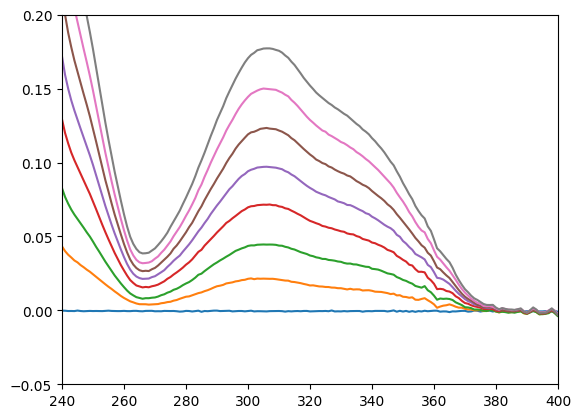

In [5]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in data.columns[1:9]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.2])

317
[[0.00126103]
 [0.00251889]
 [0.00377358]
 [0.00502513]
 [0.00627353]
 [0.0075188 ]
 [0.00876095]
 [0.01      ]]
0.9994735451615324
-0.00808989003068114
[19.21297885]


(-0.05, 0.6)

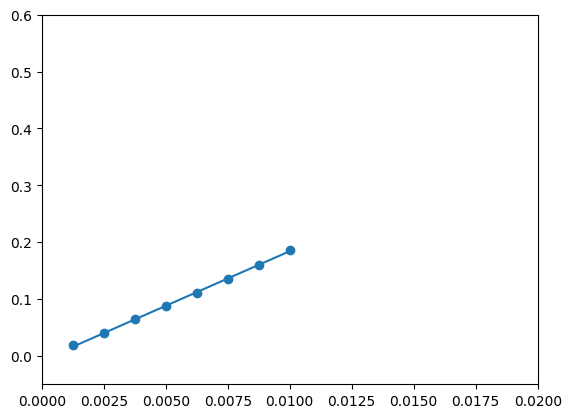

In [9]:

lig_xs = [ 0.5/396.5, 1/397, 1.5/397.5, 2/398, 2.5/398.5, 3/399, 3.5/399.5, 4/400]
lig_ys = data.iloc[317-190, 2:10]


print(data.iloc[317-190, 0])

import numpy as np
from sklearn.linear_model import LinearRegression
lig_xs_re = np.array(lig_xs).reshape(-1, 1)
lig_reg_317 = LinearRegression().fit(lig_xs_re, lig_ys)
print(lig_xs_re)
print(lig_reg_317.score(lig_xs_re, lig_ys))
print(lig_reg_317.intercept_)
print(lig_reg_317.coef_)

fig,ax = plt.subplots()
ax.scatter(lig_xs, lig_ys)
lig_ys_317_pred = np.array([lig_reg_317.predict(np.array(xr).reshape(1, -1)) for xr in lig_xs_re])

ax.plot(lig_xs_re, lig_ys_317_pred)
plt.xlim([0, 0.02])
plt.ylim([-0.05, 0.6])

(-0.05, 0.6)

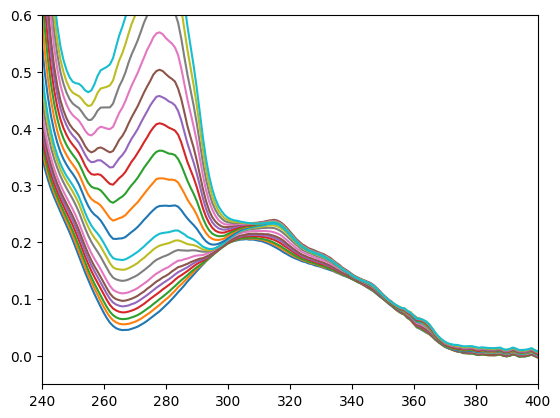

In [7]:
fig,ax = plt.subplots()
for name in data.columns[9:]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.6])

599_400_2
599_402_4
599_404_6
599_406_8
599_408_10
599_410_12
599_400_2.1
599_402_4.1
599_404_6.1
599_406_8.1
599_408_10.1
599_410_12.1
[0, 0.005, 0.009950248756218905, 0.01485148514851485, 0.019704433497536946, 0.024509803921568627, 0.02926829268292683]


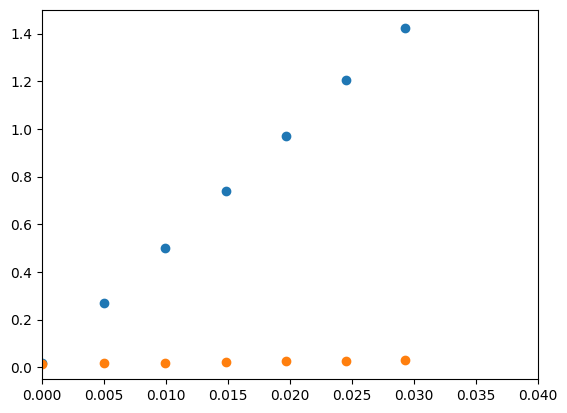

In [10]:
prot599 = pd.read_csv(workdir + '230402_protein_conc_599.csv')

prot599.columns

for name in prot599.columns[2:8]:
    print(name)
    x = prot599[name][310:410]  - prot599[prot599.columns[1]][310:410]
    y = sum(x)/len(x)
    prot599[name] = prot599[name] - y

for name in prot599.columns[9:]:
    print(name)
    x = prot599[name][310:410]  - prot599[prot599.columns[8]][310:410]
    y = sum(x)/len(x)
    prot599[name] = prot599[name] - y


fig,ax = plt.subplots()
xs = [0, 2/400, 4/402, 6/404, 8/406, 10/408, 12/410]
ys_280 = prot599.iloc[280-190, 8:]
ys_317 = prot599.iloc[317-190, 8:]
ax.scatter(xs, ys_280)
ax.scatter(xs, ys_317)

plt.xlim([0, 0.04])
plt.ylim([-0.05, 1.5])
print(xs)

In [11]:
xs_re = np.array(xs).reshape(-1, 1)
reg_280 = LinearRegression().fit(xs_re, ys_280)
print(xs_re)
print(reg_280.score(xs_re, ys_280))
print(reg_280.intercept_)

ys_280_corr = ys_280 - reg_280.intercept_
prot_conc = ys_280_corr/11460*1000*1000
print(prot_conc)
factors = [400/2, 402/4, 404/6, 406/8, 408/10, 410/12]
prot_conc_stock = []
for i in range(6):
    prot_conc_stock.append(prot_conc[i+1]*factors[i])
print(prot_conc)
print(prot_conc_stock)
print(np.mean(prot_conc_stock[1:]))

[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]]
0.9999311693175621
0.023628449991735745
TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
[4280.127848137247, 4188.756072575092, 4202.529150929301, 4185.836667923378, 4211.395663635705, 4178.412829706141]
4193.386076953922


[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]]
0.9958399928105744
0.013261708664681533
[0.59940728]


(-0.05, 0.1)

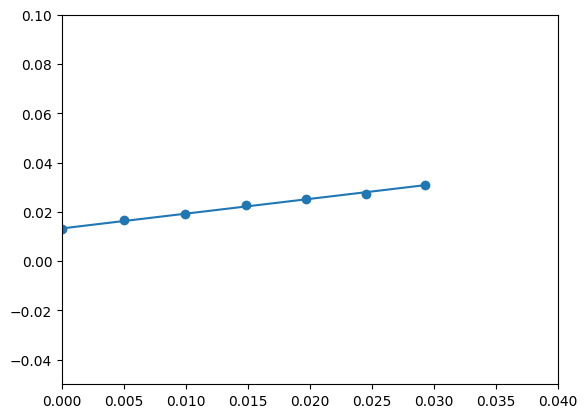

In [12]:
reg_317 = LinearRegression().fit(xs_re, ys_317)
print(xs_re)
print(reg_317.score(xs_re, ys_317))
print(reg_317.intercept_)
print(reg_317.coef_)


fig,ax = plt.subplots()
ys_317 = prot599.iloc[317-190, 8:]
ax.scatter(xs_re, ys_317)
ys_317_pred = np.array([reg_317.predict(np.array(xr).reshape(1, -1)) for xr in xs_re])

ax.plot(xs_re, ys_317_pred)
plt.xlim([0, 0.04])
plt.ylim([-0.05, 0.1])

TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
TBS2            0.012939
599_400_2.1     0.016626
599_402_4.1     0.018920
599_404_6.1     0.022740
599_406_8.1     0.025153
599_408_10.1    0.027401
599_410_12.1    0.030962
Name: 127, dtype: float64
[0.00014296]
0.013261957754802928


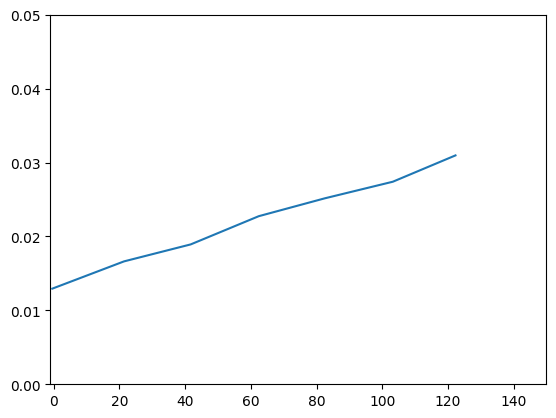

In [13]:
fig,ax = plt.subplots()
reg_prot_317_conc = LinearRegression().fit(np.array(prot_conc).reshape(-1, 1), ys_317)
print(prot_conc)
print(ys_317)
ax.plot(prot_conc, ys_317)
plt.xlim([-1, 150])
plt.ylim([0, 0.05])
print(reg_prot_317_conc.coef_)
print(reg_prot_317_conc.intercept_)

[0.0, 1.045635910224439, 2.0860696517412936, 3.121339950372209, 4.151485148514851, 5.176543209876543, 6.196551724137931, 8.221568627450981, 10.226829268292683, 12.212621359223302, 16.126923076923077, 19.966666666666665, 23.733962264150946, 27.430841121495327, 31.05925925925926, 34.62110091743119, 39.84298642533937, 44.925000000000004, 49.872687224669605, 54.69130434782609]
[0.01326196 0.01341144 0.01356017 0.01370817 0.01385544 0.01400198
 0.01414779 0.01443728 0.01472394 0.01500782 0.0155674  0.01611631
 0.01665487 0.01718336 0.01770206 0.01821125 0.01895775 0.01968425
 0.02039156 0.02108041]
real_titri_ys-----------------------------------
Nir4        0.185855
Prot1       0.189845
Prot2       0.193153
Prot3       0.198216
Prot4       0.202351
Prot5       0.206059
Prot6       0.212627
Prot8       0.219764
Prot10      0.224870
Prot12      0.228485
Prot16      0.231719
Prot20      0.233071
Prot24      0.233001
Prot28      0.233430
Prot32      0.234387
Prot36      0.235042
Prot42      0.

(-0.02, 0.2)

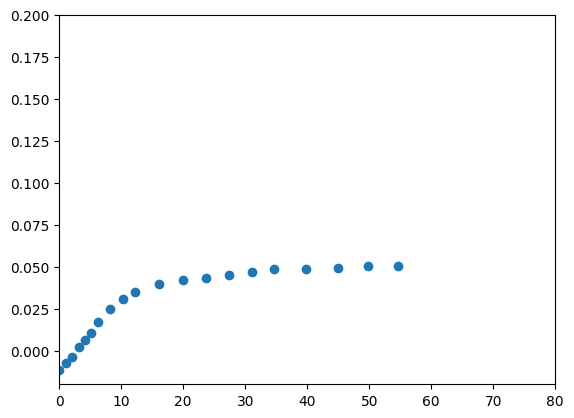

In [19]:
titri_adds = [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 42, 48, 54, 60]
#print('titri_adds-----------------------------------')
#print(titri_adds)
titri_vols = [z + 400 for z in titri_adds]
#print('titri_vols-----------------------------------')
#print(titri_vols)
prot_conc_xs = [titri_adds[i]*419.3/titri_vols[i] for i in range(len(titri_adds))]
prot_conc_ys = reg_prot_317_conc.predict(np.array(prot_conc_xs).reshape(-1, 1))
print(prot_conc_xs)
print(prot_conc_ys)
lig_titri_xs = np.array([4/x for x in titri_vols]).reshape(-1, 1)
#print('lig_titri_xs-----------------------------------')
#print(lig_titri_xs)

lig_titri_ys = lig_reg_317.predict(lig_titri_xs)
#print('lig_titri_ys-----------------------------------')
#print(lig_titri_ys)

real_titri_ys = data.iloc[317-190, 9:]
print('real_titri_ys-----------------------------------')
print(real_titri_ys)


corr_titri_ys = real_titri_ys - lig_titri_ys - prot_conc_ys

fig,ax = plt.subplots()
ax.scatter(prot_conc_xs, corr_titri_ys)


plt.xlim([0, 80])
plt.ylim([-0.02, 0.2])

In [16]:
result = pd.DataFrame({'conc':prot_conc_xs, 'abs':corr_titri_ys.values})
result.to_csv(workdir + 'nir_230418_processed.csv')